In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sympy import *
from sympy.mpmath import nsum, expm
from sympy.matrices import *
from sympy.plotting.plot import *
from sympy.functions.combinatorial.numbers import nC

from scipy.stats import multivariate_normal
from copy import deepcopy
from IPython.display import display, Math

init_printing(use_latex="mathjax")

np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

#Questão 1

## A

Conforme a equação 2.7 (página 30) de Theodoridis.

In [2]:
l = symbols('l')
x   = MatrixSymbol('x', 2, 1)
mi  = MatrixSymbol('\\mu', 2, 1)
cov = MatrixSymbol('\\Sigma', 2, 2)

m = symbols('m')

func1 = - 1/2 *(x - mi).T * cov.I * (x - mi)
func = (1 / (root( pow(2*pi,l), 2) * sqrt(det(cov)))) * exp(m)

display(Math(r'p(w|x) = ' + latex(func)))
display(Math(r'm = ' + latex(func1)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sabendo que nesse caso a covariância das duas 

Podemos então substituir os valores dados nessa equação:

In [3]:
mi1 = Matrix([[0] ,[0]])
mi2 = Matrix([[0.5], [1]])
cov1 = cov2 = Matrix([[0.2, 0], [0, 0.2]])
m1, m2 = symbols("m_1 m_2")

pcw1 = func.subs(mi,mi1).subs(cov,cov1).subs(m, m1)
m1 = func1.subs(mi,mi1).subs(cov,cov1)
pcw2 = func.subs(mi,mi2).subs(cov,cov2).subs(m, m2)
m2 = func1.subs(mi,mi2).subs(cov,cov2)

display(Math(r'p(w_1|x) = ' + latex(pcw1)))
display(Math(r'm1 = ' + latex(m1)))
display(Math(r'p(w_2|x) = ' + latex(pcw2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

De forma que nosso classificador passa a ser: $x \in w_2, if, p(w_2|x) > p(w_1|x)$

## B

Conforme equação 2.20, na página 18 do livros de Theodoridis:
$x \in w_2, if, p(x|w_2) > p(x|w_1)\frac{\lambda_{12}}\lambda_{21}$ podemos extender nosso resultado anterior da seguinte forma: $x \in w_2, if, p(x|w_2) > p(x|w_1)\frac{0.5}1$.

#Questão 2

#A

d:\Miniconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


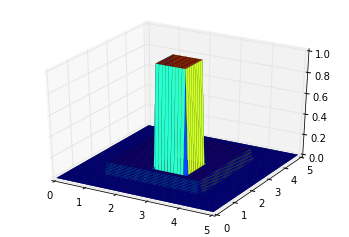

In [4]:
x, y = symbols('x y')
pa = Piecewise((1/9, And(1<= x, x <= 4, 1<= y, y <= 4)), (0, True))
pb = Piecewise((1,   And(2<= x, x <= 3, 2<= y, y <= 3)), (0, True))

plot3d(pa, pb, (x, 0, 5), (y, 0, 5), nb_of_points_x=50, nb_of_points_y=50)

#B
Podemos classificar os pontos dados de forma simples, assumindo que todos os pontos vão estar dentro do intervalo $1 <= x <= 4$ e $1 <= y <= 4$, podemos dizer que todos os pontos que estiverem no intervalo $2 <= x <= 3$ e $2 <= y <= 3$ são da classe 2, e os demais pontos da classe 1.

#Questão 3
##A
Vamos primeiro definir a formula f, sabendo que $f(x) = 0$ é a fronteira de decisão, ou seja, o hiper plano que divide as classes.

In [5]:
w = MatrixSymbol("\\omega", 3, 1)
x = MatrixSymbol("x", 3, 1)
w0 = MatrixSymbol("\\omega_0", 1, 1)
f = w.T * x + w0
Math('f = '+ latex(f))

<IPython.core.display.Math object>

Dessa forma, para verificar que x1 e x2, estão no mesmo lado da fronteira (pertencem à mesma classe), basta substituirmos os valores dados na formula.

In [6]:
x1 = Matrix([1, -1, 0.5])
x2 = Matrix([0.5, -1.5, 0.5])
w_ = Matrix([0.5, -0.5, 0.5])
w0_ = Matrix([-1/4])

f1 = Matrix(f.subs(x,x1).subs(w, w_).subs(w0, w0_)).evalf()[0]
f2 = Matrix(f.subs(x,x2).subs(w, w_).subs(w0, w0_)).evalf()[0]
print("f(x1) = {:.3f}".format(f1))
print("f(x2) = {:.3f}".format(f2))

f(x1) = 1.000
f(x2) = 1.000


Como em ambos os casos conseguimos valores positivos, concluímos que eles estão do mesmo lado da fronteira.

##B
Para isso devemos calcular onde está a fronteira de decisão. Para isso temos que: 
$r = y \frac{{w}^{T}{x} + b}{\vert{w}\vert}$.

In [7]:
#Conforme http://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html , eq 168

r1 = 1 * (w_.T * x1 + w0_) / w_.norm()
r2 = 1 * (w_.T * x2 + w0_) / w_.norm()

print("Distancia de x1 à fornteira = {:.3f}".format(r1[0]))
print("Distancia de x1 à fronteira = {:.3f}".format(r2[0]))


Distancia de x1 à fornteira = 1.155
Distancia de x1 à fronteira = 1.155


#Questão 4

Em primeiro lugar temos de calcular o valor de $p(c_1|x)$, fazemos isso sabendo que $p(c_1|x) + p(c_2|x) = 1$:

In [8]:
pc1x = symbols('pc1x')
px = symbols('px')
pc1 = 0.6
pc2 = 0.4
pxc1 = pc1x * px / pc1
pxc2 = pxc1 / 3
pc2x = pxc2 * pc2 / px
#Resolve a equacao pc1x + pc2x = 1 para pc1x
res = solve(pc1x + pc2x - 1, pc1x)[0]
res_pc2 = 1 - res
display(Math('p(c_1|x) = {:.3f}'.format(res)))
display((Math('p(c_2|x) = {:.3f}'.format(res_pc2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Com base nisso, já podemos inferir que, dado um único padrão, a probabilidade de ele ser da classe C1 é igual ao valor acima.
Para calcular a probabilidade de ele ocorrer duas ou três vezes (maioria para os casos k = 3 e k = 5, respectivamente) é:

In [9]:
#http://vassarstats.net/textbook/ch5apx.html
#Cada caso é uma distribuição binominal
def probAtLeast(n, k, p):
    '''Calcula a probabilidade de, dadas N amostrar, um evento com probabilidade p
    ocorrer "pelo menos" k  vezes (ou seja, ocorrer entre K e N vezes, inclusive)    
    '''
    res = 0
    #The end of range is excludent
    for i in range(k, n+1):        
        res +=  nC(n,i) * p ** i * (1-p) ** (n - i)
    return res
    
print('Para K=1 -> {:.3f}'.format(probAtLeast(1, 1, res)))
print('Para k=3 -> {:.3f}'.format(probAtLeast(3, 2, res)))
print('Para k=5 -> {:.3f}'.format(probAtLeast(5, 3, res)))

Para K=1 -> 0.818
Para k=3 -> 0.913
Para k=5 -> 0.955


#Questão 5

##A
Inicialmente vamos considerar que pontos mais perdo de x = (0.5, -1) são (0.5, -0.9) e (0.4, -0.6) para a classe1 e (0.1, -0.8) e (0.3, -0.7) para a classe 2.

Dessa forma, para calcularmos as pdf's do ponto (0.5, -1) fazemos conforme o algoritmo abaixo.

In [10]:
def distancia(x, y):
    dist1 = np.power(x[0] - y[0],2)
    dist2 = np.power(x[1] - y[1],2)
    res = np.sqrt(dist1 + dist2)
    return res

c1 = np.asarray([[0.5, -0.9], [0.355, -0.6]])
c2 = np.asarray([[0.2, -0.9], [0.333, -0.7]])

x = [0.5, -1]
k = 2

distC1 = []
distC2 = []

#Calcule a distancia entre X e os pontos mais próximos dele em cada classe
for i in range(k):
    distC1.append(distancia(x, c1[i]))
    distC2.append(distancia(x, c2[i]))
    
diametro1 = np.abs(c1[np.argmax(distC1)]) - np.abs(x)
diametro2 = np.abs(c2[np.argmax(distC2)]) - np.abs(x)

#eleva os elementos ao quadrado, soma elas, e tira a raiz
r1 = np.sqrt(np.square(diametro1).sum())
r2 = np.sqrt(np.square(diametro2).sum())

v1 = 3.14 * r1 ** 2
v2 = 3.14 * r2 ** 2

p1 = 2 / (100 * v1)
p2 = 2 / (100 * v2)

print("p(x|c1) = {:.4f}".format(p1))
print("p(x|c2) = {:.4f}".format(p2))


p(x|c1) = 0.0352
p(x|c2) = 0.0540


##B
Nesse caso temos de usar a equação 2.27 do livro de theodoridis na página 21. (Não podemos usar a mesma equação da primeira questão pois as covariâncias são diferentes).

In [11]:
l = symbols('l')
x   = MatrixSymbol('x', 2, 1)
mi  = MatrixSymbol('\\mu', 2, 1)
cov = MatrixSymbol('\\Sigma', 2, 2)

m = symbols('m')

func1 = - 1/2 *(x - mi).T * cov.I * (x - mi)
func = (1 / (root( pow(2*pi,l), 2) * sqrt(det(cov)))) * exp(m)

display(Math(r'p(w|x) = ' + latex(func)))
display(Math(r' em = ' + latex(func1)))

mi1 = mi2 = Matrix([[0] ,[0]])
cov1 = Matrix([[0.5,  0.25], [ 0.25, 0.5]])
cov2 = Matrix([[1.0, -0.50], [-0.50, 1.0]])
x_ = Matrix([ [0.5], [-1] ])

pcw1 = Matrix(func1.subs(x, x_).subs(mi, mi1).subs(cov, cov1))[0]
pcw1 = func.subs(l, 2).subs(cov, cov1).subs(m, pcw1)
pcw1 = pcw1.doit().evalf()

pcw2 = Matrix(func1.subs(x, x_).subs(mi, mi2).subs(cov, cov2))[0]
pcw2 = func.subs(l, 2).subs(cov, cov2).subs(m, pcw2)
pcw2 = pcw2.doit().evalf()

display(Math(r'p(w_1|x) = ' + latex(pcw1)))
display(Math(r'p(w_2|x) = ' + latex(pcw2)))

#Para confirmar o valor encontrado
#print(multivariate_normal(mean=[0,0], cov=[[0.5,  0.25], [ 0.25, 0.5]]).pdf([ 0.5, -1 ]))
#print(multivariate_normal(mean=[0,0], cov=[[1.0, -0.50], [-0.50, 1.0]]).pdf([ 0.5, -1 ]))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

##C
Usando um classificador bayesiano, ele classificaria o ponto X como sendo da classe 1, se usassemos a PDF estimada com pelo K means, e como sendo da classe 2, usando os valores dados no item B.

Nesse caso é preferível usar os dados do item B, pois eles refletem os valores reais dos dados, enquanto que a PDF calculada no item A é apenas uma aproximação.

A PDF vai tender a ser igual ao do item B, quanto mais pontos considerarmos (k = 100, por exemplo), conforme explicado na página 57 de Theodoridis.

#Questão 6

As funções de ativação que temos são:

In [12]:
x, y, B = symbols('x y \\beta')
eqa = 1 / (1 + exp(-B*x))
eqb = 1 / (sqrt(x ** 2 + B))

display(Math(r'a = ' + latex(eqa)))
display(Math(r'b = ' + latex(eqb)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A função de custo é dada pela derivada da função de ativação.

In [13]:
display(Math(r'\frac{da}{dx} = ' + latex(eqa.diff(x))))
display(Math(r'\frac{db}{dx} = ' + latex(eqb.diff(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como queremos que a função de custo seja dada em função da saída do neurônio (ou seja, da própria função de ativação):

In [14]:
eqa_ = eqa.diff(x).subs(eqa, y)
eqb_ = eqb.diff(x).subs(eqb, y)

display(Math(r'J(a) = ' + latex(eqa_)))
display(Math(r'J(b) = ' + latex(eqb_)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#Questão 7

Inicialmente devemos saber que a atualização dos pesos, usando o backpropagation é dada por $\omega_{new} = \omega{old} +\Delta{\omega}$. E que $\Delta{\omega} = -\mu{}\frac{dJ}{d\omega}$.

No nosso exemplo, nossa função de custo J, é o erro médio quadrado $J = \sum_{i=1}^{n}{y' - y}$, onde $y'$ é a função de ativação do neurônio com o peso atual $\omega$ e $y$ é o valor esperado.

Vamos, inicialmente definir nossas variáveis, que vão representas, a taxa de aprendizado (alpha), os pesos dos bias ($b_0, b_1, b_2 e b_3$).

In [15]:
#alpha, x0, w11, w21, w22, w23 = symbols('\\alpha x0 w_1^1 w_1^2 w_2^2 w_3^2', RealNumber = True)



E nossas funções de ativação são:

In [16]:
#y, t1, t2, t3 = symbols("y t_1 t_2 t_3", Integer=True)

#x0 é o valor de entrada, w11 é o peso da primeira camada (entrada)
#y11 = tanh(v0)
#A funcao de ativacao da primeira camada é
#j01 = 1/2 * sqrt(y11 - y)

#Vamos definir a ativação da camada escondida em função da saída da primeira camada
#z = symbols('z')
#y21 = exp(z * w21 + b1)
#y22 = exp(z * w22 + b2)
#y23 = exp(z * w23 + b3)

#Vamos calcular o valor de p (a saída do MLP)

#Contar p como camada de saída
#Calcular a retropropagação a partir de p, passando por y
#p1 = y21 / (y21 + y22 + y23)
#p2 = y22 / (y21 + y22 + y23)
#p3 = y23 / (y21 + y22 + y23)

#j11 = t1 - p1
#j12 = t2 - p2
#j13 = t3 - p3

O calculo do valor do gradient descent é dado pela formula $w = w_{old} - \alpha * \frac{dJ}{dw_{old}}$. E para o caso especial do erro quadrático médio (Theodoridis eq 4.12, p. 166) : $ \frac{dJ}{dw_{old}} = \Delta{w_j^r} = \sum_{i=1}^{N}{e * f'(v) * x}$

In [25]:
alpha = symbols("\\alpha")

#Valor da entrada
x0 = symbols('x_0')
#Peso da camada oculta
w0 = symbols('w_0')
#Bias da camada oculta
b0 = symbols("b_0")
v0 = x0 * w0 + b0
#Valor da saída da camada oculta
y0 = tanh(v0)

#Vamos definir o valor de entrada da camada oculta em função de Z
z = symbols("z")
#Peso de saída
w1, w2, w3 = symbols('w_1, w_2, w_3')
#Bias de saída
b1, b2, b3  = symbols("b_1, b_2, b_3")
v1 = z * w1 + b1
v2 = z * w2 + b2
v3 = z * w3 + b3
#Saídas de saída
y1 = exp(v1)
y2 = exp(v2)
y3 = exp(v3)

#Probabilidade da saída
p1 = y1 / (y1 + y2 + y3)
p2 = y2 / (y1 + y2 + y3)
p3 = y3 / (y1 + y2 + y3)


######
##Inicio do Back Propagation
######
p_1,p_2, p_3, y_1, y_2, y_3 = symbols("p_1 p_2 p_3 y_1 y_2 y_3")

#A ultima camada não possui pesos, então não há mudança a ser feita
#Vamos simplesmente calcular o erro a ser usado na camada anterior 
t1, t2, t3, = symbols("t_1 t_2 t_3")

e1 = t1 - p1
e2 = t2 - p2
e3 = t3 - p3
#No caso do somatorio da camada de saída usamos o "1" como peso
som_saida1  = 1 * e1 * p1.diff(y1) + 1 * e2 * p2.diff(y1) + 1 * e3 * p3.diff(y1)
som_saida2  = 1 * e1 * p1.diff(y2) + 1 * e2 * p2.diff(y2) + 1 * e3 * p3.diff(y2)
som_saida3  = 1 * e1 * p1.diff(y3) + 1 * e2 * p2.diff(y3) + 1 * e3 * p3.diff(y3)


#Para as camandas "anteriores" temos:
# delta  = - alpha * somatorio ( saída_desse_neuronio * derivada(ativacao)(nas_entradas) * somatório(peso * erro *  derivada(ativacao)(nas_entradas) )))
dExp = exp(x).diff(x)

somatorio1 = y1 * dExp.subs(x, v1) * som_saida1
somatorio2 = y2 * dExp.subs(x, v2) * som_saida2
somatorio3 = y3 * dExp.subs(x, v3) * som_saida3


w1new = w1 - alpha * somatorio1
w1new = Subs(w1new, (p1, p2, p3, y1, y2, y3 ), (p_1, p_2, p_3, y_1, y_2, y_3)).doit().simplify()

w2new = w2 - alpha * somatorio2
w2new = Subs(w2new, (p1, p2, p3, y1, y2, y3 ), (p_1, p_2, p_3, y_1, y_2, y_3)).doit().simplify()

w3new = w3 - alpha * somatorio3
w3new = Subs(w3new, (p1, p2, p3, y1, y2, y3 ), (p_1, p_2, p_3, y_1, y_2, y_3)).doit().simplify()


#Calculo da atualizacao da camada de entrada
dTanhh = tanh(x).diff(x)
somatorio0 = y0 + dTanhh.subs(x, v0) * (somatorio1 + somatorio2 + somatorio3)

w0new = w0 - alpha * somatorio0
w0new = Subs(w0new, (p1, p2, p3, y1, y2, y3 ), (p_1, p_2, p_3, y_1, y_2, y_3)).doit()

#display(Math("s_0 = " + latex(som_saida)))

display(Math("w_{1new} = " + latex(w1new)))

display(Math("w_{2new} = " + latex(w2new)))

display(Math("w_{3new} = " + latex(w3new)))

display(Math("w_{0new} = " + latex(w0new)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#Questão 8

Abordagem usando pseudo-inversão:

In [97]:
#Baseado em http://www.cedar.buffalo.edu/~srihari/CSE555/Chap5.Part3.pdf
# e em https://www.byclb.com/TR/Tutorials/neural_networks/ch9_1.htm equacao 9.33
x = Matrix([[-2,    1], 
            [-1,    1],
            [2.5,   1],
            [-1.8,  1],
            [3.5,   1],
            [1.5,   1],
            [2.1,   1],
            [3.8,   1]])             
y =  Matrix([1,  1,  1,    1,   -1,  -1,   -1,   -1])

r = (x.T * x).inv() * x.T * y
display(r)

⎡-0.34201321414691⎤
⎢                 ⎥
⎣0.367664205207929⎦

Dessa foma o classificador que devemos usar é, dado um novo dado $x$, multiplicamos o vetor $[x, 1]$ pelo vetor dado acima, e encotraremos a classe com base no sinal do resultado.

##Abaixo código de tentativa de uso de rede neural
Para esse caso usaremos um único perceptron com função de ativação sendo a tangente hiperbolica, de tal modo que, o resultado de saída será 1 para a classe 1, e -1 para a classe 2. E inicareos o peso com neurônio como sendo 0.

In [109]:
#Vetores de entrada e saída
entrada = [ -2, -1, 2.5, -1.8, 3.5, 1.5, 2.1, 3.8]
saida = [ 1, 1, 1, 1, -1, -1, -1, -1]

train = list(zip(entrada, saida))

#Funcao de ativação
x, w, s, b = symbols('x w s b')
act = tanh(x * w + b)
display(Math(r'act(x) = ' + latex(act)))

#De forma que a a função de custo (MSE) é
cost = s * act
display(Math(r'J(x) = ' + latex(cost)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Conforme vimos no exemplo anterior o processo de atualização, usando o gradient descent, é dado por $w = w_{old} + \alpha * \frac{df}{dw_{old}}$, de forma que temos:

In [110]:
y, n, alpha = symbols('y n \\alpha')
#Calcue a derivada da funcao de costo em funcao de w (usada no gradient descent)
dCost_w = cost.diff(w)
dCost_b = cost.diff(b)
w_novo = w - alpha * summation(s * dCost_w, (x, 1, n))
b_novo = b - alpha * summation(s * dCost_b, (x, 1, n))

display(Math(r'dJ/dw = ' + latex(dCost_w)))
display(Math(r'dJ/db = ' + latex(dCost_b)))

display(Math(r'w_{novo} = ' + latex(w_novo)))
display(Math(r'b_{novo} = ' + latex(b_novo)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Inicialmente devemo então proceder interactivamente para que possamos calcular o valor final w para treinarmos o neurônio. Nesse caso vamos iniciar o valores de $w = 5$ e $\alpha = 0.5$ e $b = 1$.

In [113]:
#Valor inicial de W
w_ = 1
b_ = 1
#Taxa de aprendizado
alpha = 0.5
#Inicie summ com um valor diferente de zero para ele passar pelo primeir0 loop
summ = 0.1
summ_w = 0
summ_b = 0
#while abs(summ) > 0.001:
for i in range(10):
    summ = 0
    summ_w = 0
    summ_b = 0
    #Pegue todos os elementos de treinamento e verifique os valores obtidos
    for x_, y_ in train:        
        #Verifque aqueles que estao classificados errado
        #E comece a calcular o somatorio(conforme equação acima)
        y_obt = act.subs(x, x_).subs(w, w_).subs(b, b_).doit().evalf()
        if y_obt != y_:
            print("y_ = {}. y_opt = {}".format(y_, y_obt))
            summ   += (y_obt - y_).evalf()
            summ_w += dCost_w.subs(w, w_).subs(x, x_).subs(b, b_).subs(s, y_).doit().evalf()
            summ_b += dCost_b.subs(w, w_).subs(x, x_).subs(b, b_).subs(s, y_).doit().evalf()
    #Calcule o novo valor de w
    if (summ != 0):
        w_ = w_ + alpha * summ_w
        b_ = b_ + alpha * summ_b
        print("summ = {:.5f}".format(summ))        
        print("summ_w = {:.5f}".format(summ_w))
        print("summ_b = {:.5f}".format(summ_b))
        print("w = {:.5f}".format( w_))
        print("b = {:.5f}".format( b_))

y_ = 1. y_opt = -0.761594155955765
y_ = 1. y_opt = 0
y_ = 1. y_opt = 0.998177897611199
y_ = 1. y_opt = -0.664036770267849
y_ = -1. y_opt = 0.999753210848027
y_ = -1. y_opt = 0.986614298151430
y_ = -1. y_opt = 0.995949359221900
y_ = -1. y_opt = 0.999864551700760
summ = 3.55473
summ_w = -2.89677
summ_b = 1.94723
w = -0.44838
b = 1.97361
y_ = 1. y_opt = 0.993595964024538
y_ = 1. y_opt = 0.984372066698927
y_ = 1. y_opt = 0.692453024015518
y_ = 1. y_opt = 0.992342746314697
y_ = -1. y_opt = 0.383595495083093
y_ = -1. y_opt = 0.861990059335101
y_ = -1. y_opt = 0.774712030623678
y_ = -1. y_opt = 0.263395317015080
summ = 5.94646
summ_w = -6.52918
summ_b = -1.86073
w = -3.71297
b = 1.04325
y_ = 1. y_opt = 0.999999911939719
y_ = 1. y_opt = 0.999852158922893
y_ = 1. y_opt = -0.999999860502069
y_ = 1. y_opt = 0.999999611143440
y_ = -1. y_opt = -0.999999999916915
y_ = -1. y_opt = -0.999765812302744
y_ = -1. y_opt = -0.999997279892543
y_ = -1. y_opt = -0.999999999991046
summ = -1.99991
summ_w = -0.00

Dessa forma, temos que a a função usada para descobrir a classe qualquer novo elemento x é dada por:

In [73]:
display(Math(r'act = ' + latex(act.subs(w, w_).subs(b,b_))))

<IPython.core.display.Math object>

#Questão 9

Calculo da máxima entropia de cada um dos elementos, conforme eqs 4.113 e 4.114 de Theodoris (pgs. 218 e 219). Primeiro vamos definir algumas funções que vão nos auxiliar no calculo final.

In [114]:
def entropy(p1, p2):
    '''Calcula a entopia de um conjunto de dados que possui duas classes
    com probabilidades p1 e p2, respectivamente
    '''
    if p2 != 0:
        p2 = p2 * np.log2(p2)
    if p1 != 0:
        p1 = p1 * np.log2(p1) 
    return - (p1 + p2)

def impurity(df):
    '''Calcula a impureza de uma dada tabela de dados.
    Esse algoritmo assume que só existem duas classes 
    e que a coluna de classificacao se chama "paga"
    '''
    #Define a probabilidade inicial das classes como 0
    p1 = p2 = 0
    #Calcule as probabilidades
    res = df['paga'].value_counts()/ df.shape[0]
    #Pode ser que alguma classe não apareça, vamos checar...    
    if 0 in res:
        p1 = res[0]
    if 1 in res:
        p2 = res[1]    
    return entropy(p1, p2)

def impurity_delta(df, split):
    '''Calcula o delta da impureza da base de dados df,
    depois de se fazer uma divisão usando a coluna split.
    Assume que os valores da coluna split só podem ser 0 ou 1.
    '''
    df0 = df[df[split] == 0]    
    df1 = df[df[split] == 1]    
    ori = impurity(df)
    imp0 = impurity(df0)    
    imp1 = impurity(df1)
    delta = ori - df.shape[0] * imp0 / df0.shape[0] - df.shape[0] * imp1 / df1.shape[0]     
    return delta

Agora vamos definir nossos dados.
Note que existem alguns dados faltantes. Vamos tratar esses casos substituindo os NaN pelo modo dos valores das colunas.

In [115]:
#Codificacoes:
#universitario = 1, segundo grau =0
#salario 7k = 1, salario 2k = 0
#casa propria sim = 1, casa propria nao = 0
#sexo masculino = 1, sexo feminino = 0
#Emprestimo no prazo sim = 1, emprestimo no prazo nao = 0
dados = [[1, 1, 1, 1, 1],
         [0, np.nan, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1],
         [1, 0, 1, 0, 1],
         [0, 1, 0, 1, 0],
         [1, 0, np.nan, 0, 1],
         [0, 0, 0, 1, 0]]

df = pd.DataFrame(dados, columns=['instrucao', 'salario', 'casa', 'sexo', 'paga'])

df['salario'] = df['salario'].fillna(df['salario'].mode()[0])
df['casa'] = df['casa'].fillna(df['casa'].mode()[0])

 Agora podemos calcular a variação da entropia para cada critério de separação.

In [116]:
print("Impurity original: {}".format(impurity(df)))
print("------")
for col in ['instrucao', 'salario', 'casa', 'sexo']:
    print("Criterio: {}".format(col))
    print("Impurity0 = {:.5f}. Impurity1 = {:.5f}".format(impurity(df[df[col] == 0]), impurity(df[df[col] == 1])))
    print("Delta criterio = {}".format(impurity_delta(df, col)))
    print("------")

Impurity original: 0.9182958340544896
------
Criterio: instrucao
Impurity0 = 1.00000. Impurity1 = 0.72193
Delta criterio = -2.6311747367427625
------
Criterio: salario
Impurity0 = 0.72193. Impurity1 = 1.00000
Delta criterio = -2.6311747367427625
------
Criterio: casa
Impurity0 = 0.97095. Impurity1 = -0.00000
Delta criterio = -0.829415235963914
------
Criterio: sexo
Impurity0 = -0.00000. Impurity1 = 1.00000
Delta criterio = -0.5817041659455104
------


Dessa forma podemos concluir que o melhor critério de separação (inicialmente), é o "sexo".

#Questão 10

<img src="foo.png">

#Questão 11

In [117]:
#Algoritmo baseado em http://www.ics.uci.edu/~smyth/courses/cs274/notes/EMnotes.pdf
def expectation(X, K, alpha):
    #Crie um array de zeroes de X x K
    # Esse array vai servir para guardar o valor da pdf de cada gausiana 
    #para cada observação
    w = np.zeros([len(X), len(K)])

    ############
    #Calculo da expectation
    ############
    #Para todas as observacoes
    for i in range(len(X)):    
        #Calcule o somatorio de todas as gausianas para essa observacao
        somatorio = 0
        for k in range(len(K)):        
            somatorio = K[k].pdf(X[i].T) * alpha[k]
        #Agora guarde o novo valor de w    
        for k in range(len(K)): 
            w[i,k] = (K[k].pdf(X[i].T) * alpha[k]) / somatorio

    #Calcule a soma de todas as linhas (ou seja, o valor total de K para cada observacao)
    soma_w = w.sum(axis=1).reshape([len(X),1])
    #Agora tem a probabilidade de x(linhas) pertencer a cada uma das classes (colunas)
    w = w / soma_w
    
    return w

def maximization(w, X, K, alpha):
    ############
    #Calculo da maximizacao
    ############

    #Primeiro vamos atualizar os valores de alpha
    #Calcule a soma dos valores do vetor w com respeito K
    N = w.sum(axis=0)
    Ntotal = N.sum()
    mi = []

    #E calcule a percentagem para cada um
    for k in range(len(alpha)):
        alpha[k] = N[k] / Ntotal
    
    #Novo calculo das medias
    #Para cada gausiana
    for k in range(len(K)):
        #Calcule o somatorio de x pelo peso da gausiana para aquele elemento
        somatorio = 0
        for i in range(len(X)):
            somatorio += w[i,k] * X[i]

        mi.append(somatorio/N[k])

    #Calculo da nova covariancia
    #Para cada gausiana
    for k in range(len(K)):
        #Calcule o somatorio
        somatorio = 0    
        for i in range(len(X)):    
            somatorio += w[i,k] * (X[i] - mi[k]) * (X[i] - mi[k]).T

        cov[k] = somatorio / N[k]    
    
    return alpha, mi, cov
    
#Matriz de médias (duas matrizes de 2x1)
mi1 = np.matrix([-1, -1]).T
mi2 = np.matrix([ 1,  0]).T
mi = [mi1, mi2]

#Tabela de covariância (duas matrizes de 2x2)
cov1 = np.matrix([[0.5,  0.25],[ 0.25, 0.5]])
cov2 = np.matrix([[1.0, -0.5], [-0.5,  1.0]])                
cov = [cov1, cov2]

norm1 = multivariate_normal(mean=mi[0].T.tolist()[0], cov=cov[0])
norm2 = multivariate_normal(mean=mi[1].T.tolist()[0], cov=cov[1])
K = [norm1, norm2]

#A probabilidade de cada gausiana
alpha = [ 0.5, 0.5]

#O array com as observacoes
X = [np.matrix([-0.5, -0.5]).T, 
     np.matrix([-1.0, -1.0]).T,
     np.matrix([ 1.0,  0.0]).T]

w = expectation(X, K, alpha)
alpha, mi, cov = maximization(w, X, K, alpha)
    
print("W = \n{}\n--".format(w))        
print("Alpha = \n{}\n--".format(alpha))    
print("mi[0]= \n{}\nmi[1]= \n{}\n--".format(mi[0], mi[1]))
print("covariancia[0] = \n{}\ncovariancia[1] =\n{}".format(cov[0], cov[1]))

W = 
[[ 0.926   0.074 ]
 [ 0.9953  0.0047]
 [ 0.0353  0.9647]]
--
Alpha = 
[0.65221151467263982, 0.34778848532736012]
--
mi[0]= 
[[-0.7273]
 [-0.7453]]
mi[1]= 
[[ 0.8846]
 [-0.04  ]]
--
covariancia[0] = 
[[ 0.1162  0.085 ]
 [ 0.085   0.0715]]
covariancia[1] =
[[ 0.1643  0.0576]
 [ 0.0576  0.0206]]


#Questão 12


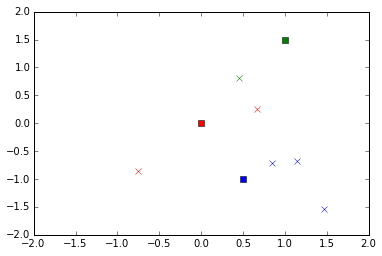

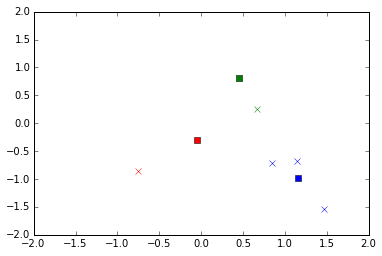

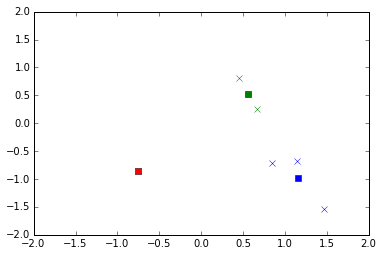

Pontos medios finais
[-0.76 -0.85]
[ 0.56  0.53]
[ 1.1533 -0.98  ]
Pontos nos três conjuntos
[[-0.76, -0.85]]
[[0.67, 0.25], [0.45, 0.81]]
[[1.47, -1.54], [1.14, -0.68], [0.85, -0.72]]


In [118]:
def distancia(x, y):
    dist1 = np.power(x[0] - y[0],2)
    dist2 = np.power(x[1] - y[1],2)
    res = np.sqrt(dist1 + dist2)
    return res

conjuntos = [[],[],[]]
old_conjuntos = None

media = [[0, 0],
         [1, 1.5],
         [0.5, -1]]

dados = [[-0.76,  -0.85],
         [ 0.67,   0.25],
         [ 1.47,  -1.54],
         [ 1.14,  -0.68],
         [ 0.85,  -0.72],
         [ 0.45,   0.81]]


colors = ['r', 'g', 'b']
while old_conjuntos != conjuntos:
    old_conjuntos = deepcopy(conjuntos)
    conjuntos = [[],[],[]]
      
    #Para todos os dados do conjunto
    for d in range(len(dados)):        
        dists = []
        #Calcule a distancia do ponto para cada media (ponto central)
        for m in range(len(media)):           
            dists.append(distancia(media[m], dados[d]))
        #Coloque esse ponto no conjunto de media menos distante
        conjuntos[np.argmin(dists)].append(dados[d])    
        
    #Plot o grafico para vermos o andamento
    for i in range(len(conjuntos)):
        plt.plot([x[0] for x in conjuntos[i]], [x[1] for x in conjuntos[i]], 'rx', color=colors[i])       
        plt.plot(media[i][0], media[i][1], 'rs', color=colors[i])   
    plt.axis([-2, 2, -2, 2])
    plt.show()
    
    #Atualize a media (ponto central) de cada conjunto
    for c in range(len(conjuntos)):
        #Se esse conjunto tem algum elemento atualize a media
        if len(conjuntos[c]) > 0 :            
            media[c] = np.mean(conjuntos[c], axis=0)
    
    
print("Pontos medios finais")        
for m in media:
    print(m)
print("Pontos nos três conjuntos")
for c in conjuntos:
    print(c)


#Questão 13

Para calcular a GMM usando os valores da questão anteriores, partimos do pressuposto que existem 3 gausianas (já que encontramos três grupos na uqestão anterior).
Para iniciar os valores do GMM precisamos de alguns elementos:
* __média de cada grupo/gausiana__: calculado na questão anterior
* __covariância de cada grupo__: calculado manualmente. No caso de um grupo possuir somente um elemento assumimos que sua matriz de covariância é 0
* __probabilidade de cada gausiana__: calculamos o número de elementos de cada grupo, pelo tamanho total da amostra

Além do problema de determinar a covariância de um grupo com uma única matriz, tivemos de utilizar pseudo-inversão em todos os casos, pois as matrizes de covariâncias encontradas são singulares.

In [119]:
cov = []
alpha = []
for i in range(len(conjuntos)):    
    matrizes = conjuntos[i]
    if len(matrizes) == 1:
        matrizes = np.vstack([matrizes,matrizes])
    cov.append(np.cov(matrizes, rowvar=0))
    alpha.append(len(matrizes) / 6)
    
    
#Vamos transformar as medias e os dados para matrizes (na questão passada eles eram listas)    
_media = []
for m in media:    
    _media.append(np.matrix(m).T)
    
_dados = []
for d in dados:
    _dados.append(np.matrix(d).T)

#Crie as gausianas, como na questão 11
norm1 = multivariate_normal(mean=media[0].T.tolist(), cov=cov[0], allow_singular=True)
norm2 = multivariate_normal(mean=media[1].T.tolist(), cov=cov[1], allow_singular=True)
norm3 = multivariate_normal(mean=media[2].T.tolist(), cov=cov[2], allow_singular=True)

K = [norm1, norm2, norm3]

#Calculo a expectativa e a maximazação
w = expectation(_dados, K, alpha)
alpha, mi, cov = maximization(w, _dados, K, alpha)
    
print("W = \n{}\n--".format(w))        
print("Alpha = \n{}\n--".format(alpha))    
print("mi[0]= \n{}\nmi[1]= \n{}\n--".format(mi[0], mi[1]))
print("covariancia[0] = \n{}\ncovariancia[1] =\n{}".format(cov[0], cov[1]))


W = 
[[ 0.863   0.137   0.    ]
 [ 0.5592  0.4084  0.0323]
 [ 0.3821  0.      0.6179]
 [ 0.3812  0.0025  0.6163]
 [ 0.3805  0.0042  0.6153]
 [ 0.5777  0.4219  0.0004]]
--
Alpha = 
[0.52396103592423349, 0.1623412838710302, 0.31369768020473626]
--
mi[0]= 
[[ 0.4131]
 [-0.3968]]
mi[1]= 
[[ 0.3755]
 [ 0.3312]]
--
covariancia[0] = 
[[ 0.6127 -0.0052]
 [-0.0052  0.5797]]
covariancia[1] =
[[ 0.2227  0.19  ]
 [ 0.19    0.3057]]


#Questão 14

$$\frac{\sum_{i=1}^{N}{x_i}} {N}$$

$$\frac{(x_N + \sum_{i=1}^{N-1}{x_i})}{ N}$$

$$\frac{x_N}{N} + \frac{\sum_{i=1}^{N-1}{x_i}}{N}$$

$$\frac{x_N}{N} + \frac{\sum_{i=1}^{N-1}{x_i}}{N-1} * \frac{N-1}{N}$$

$$\frac{x_N}{N} +  \mu_{N-1}* \frac{N-1}{N}$$

$$\frac{x_N + N* \mu_{N-1} - \mu_{N-1}}{N}$$

$$\frac{N* \mu_{N-1}}{N}+ \frac{x_N - \mu_{N-1}}{N}$$

$$\mu_{N-1}+ \frac{1}{N}*(x_N - \mu_{N-1})$$

#Questão 15

In [218]:
def train(x, y):    
    r = np.linalg.pinv(x)* y
    return r

def pred(x, param):
    return x * param


#Questão 16

Dados conseguidos de: http://archive.ics.uci.edu/ml/datasets/SPECT+Heart

In [219]:
df = pd.read_csv("SPECT.train", header=None)
test = pd.read_csv("SPECT.test", header=None)

x = np.asmatrix(df.loc[: , 1:])
y = np.asmatrix(df.loc[:, 0]).T

x_test = np.asmatrix(test.loc[: , 1:])
y_test = np.asmatrix(test.loc[:, 0]).T

r = train(x, y)
print(r)
res = pred(x_test, r)
(res == y_test).sum()/len(res)

[[-0.1231]
 [-0.1684]
 [-0.6333]
 [ 0.327 ]
 [ 0.056 ]
 [ 0.226 ]
 [ 0.323 ]
 [ 0.5811]
 [-0.2672]
 [ 0.2224]
 [ 0.2133]
 [-0.1707]
 [ 0.3675]
 [ 0.1231]
 [-0.0627]
 [ 0.2324]
 [ 0.1966]
 [-0.1604]
 [ 0.0057]
 [ 0.1236]
 [ 0.0941]
 [ 0.2201]]


0.0374331550802